Model Accuracy: 95.61%

Confusion Matrix:
 [[38  5]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



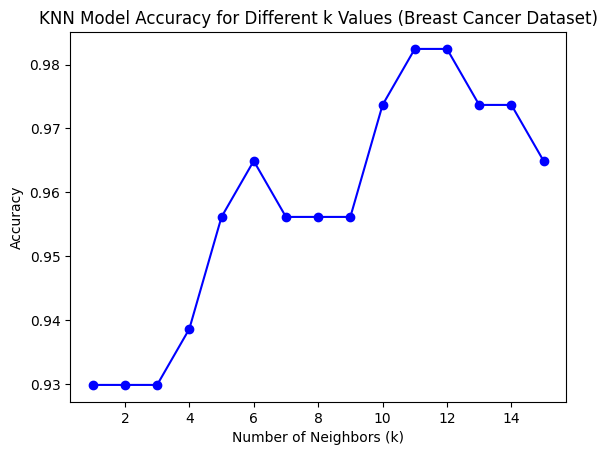

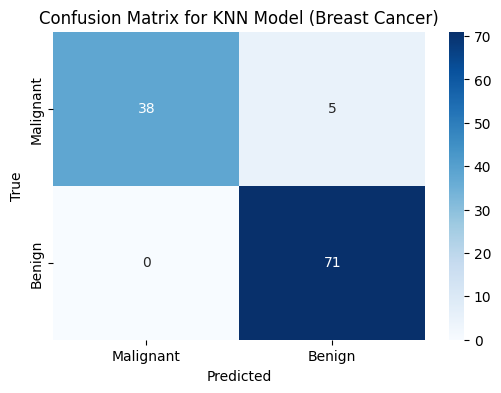

Silhouette Score: 0.5528


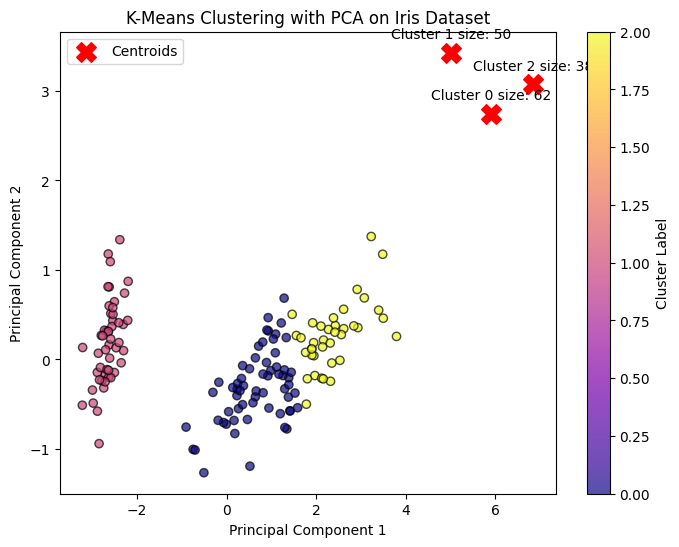

In [20]:
# Import necessary libraries
#---9a----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target  # Features and labels

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")  # Accuracy in percentage format

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Plot accuracy for different values of k
k_values = range(1, 16)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plotting the accuracy for different k values
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different k Values (Breast Cancer Dataset)')
plt.show()

# Visualizing Confusion Matrix with a Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN Model (Breast Cancer)')
plt.show()
#---9b---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (4D)
y_true = iris.target  # True labels (for reference)

# Apply K-Means Clustering with 3 clusters (correcting for actual species count)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Corrected to 3 clusters
y_kmeans = kmeans.fit_predict(X)

# Calculate Silhouette Score (higher is better)
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='plasma', edgecolors='k', alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label="Centroids")

# Annotate cluster sizes
for i, center in enumerate(kmeans.cluster_centers_):
    cluster_size = np.sum(y_kmeans == i)
    plt.annotate(f'Cluster {i} size: {cluster_size}',
                 (center[0], center[1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA on Iris Dataset")
plt.legend()
plt.colorbar(scatter, label="Cluster Label")
plt.show()
